In [2]:
#####import require libraries##################################
# import pandas and pandas_profiling
import pandas as pd
from pandas.api.types import CategoricalDtype
#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
##Turn interactive plotting off
plt.ioff()
#import numpy 
import numpy as np
#import seaborn
import seaborn as sns

In [113]:
# load data
df_cat=pd.read_csv(r"data/category.csv") 

In [114]:
#Read data cloumns
df_cat_list = list(df_cat.columns)
print(df_cat_list)

['Unnamed: 0', 'block', 'date_0', 'date_1', 'date_2', 'temper', 'cnt_sum', 'precip', 'Sum_aantal', 'G_ROADLENGTH', 'P_ROADLENGTH', 'BOS_AREA', 'BEBOUWD_AREA', 'BEDRIJFSTERREIN_AREA', 'DROOG_AREA', 'GLAS_AREA', 'HOOFDWEG_AREA', 'LANDBOUW_AREA', 'other', 'label']


In [116]:
# view last rows
df_cat.tail(5)

,Unnamed: 0,block,date_0,date_1,date_2,temper,cnt_sum,precip,Sum_aantal,G_ROADLENGTH,P_ROADLENGTH,BOS_AREA,BEBOUWD_AREA,BEDRIJFSTERREIN_AREA,DROOG_AREA,GLAS_AREA,HOOFDWEG_AREA,LANDBOUW_AREA,other,label
494062,265657,20558,2017.0,6.0,26.0,21.2392,0.0,0.000000,55.0,1230.747725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
494063,265658,20558,2017.0,6.0,27.0,21.2016,0.0,0.863330,55.0,1230.747725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
494064,265659,20558,2017.0,6.0,28.0,21.8776,0.0,7.977540,55.0,1230.747725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
494065,265660,20558,2017.0,6.0,29.0,21.3535,0.0,0.580437,55.0,1230.747725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
494066,265661,20558,2017.0,6.0,30.0,21.2245,0.0,11.389900,55.0,1230.747725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [117]:
# Descriptivve statistics of the data
df_cat.describe()


,Unnamed: 0,block,date_0,date_1,date_2,temper,cnt_sum,precip,Sum_aantal,G_ROADLENGTH,P_ROADLENGTH,BOS_AREA,BEBOUWD_AREA,BEDRIJFSTERREIN_AREA,DROOG_AREA,GLAS_AREA,HOOFDWEG_AREA,LANDBOUW_AREA,other,label
count,494067.000000,494067.000000,494067.0,494067.000000,494067.000000,494067.000000,494067.000000,494067.000000,494067.000000,494067.000000,494067.000000,494067.000000,494067.000000,494067.000000,494067.000000,494067.000000,494067.000000,494067.000000,494067.0,494067.000000
mean,132074.061022,27349.840690,2017.0,3.612621,15.860814,14.251332,0.008485,1.623797,2046.384164,4646.594188,0.822349,23922.334085,46819.970461,3419.751157,162.010853,227.555514,1803.506004,573.204630,0.0,0.010928
std,76282.114272,4942.232073,0.0,1.827117,8.893944,8.497286,0.290005,3.494220,3482.927912,4166.222365,23.479593,104391.704641,136745.564798,29234.940116,3277.735487,7610.725467,8372.687350,18479.128649,0.0,0.204064
min,0.000000,20017.000000,2017.0,1.000000,1.000000,-1.963560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,66133.500000,23521.000000,2017.0,2.000000,8.000000,7.736890,0.000000,0.000000,165.000000,2131.173196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,131546.000000,26606.000000,2017.0,4.000000,16.000000,13.720100,0.000000,0.034451,655.000000,3307.282986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,197658.000000,29952.000000,2017.0,5.000000,24.000000,21.260200,0.000000,1.651620,2295.000000,5422.020741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,265661.000000,40904.000000,2017.0,6.000000,31.000000,34.464400,45.000000,40.240500,31635.000000,24086.488746,1005.628675,1000000.000000,933425.146131,817615.206479,107859.030029,414995.002802,113089.413277,1000000.000000,0.0,4.000000


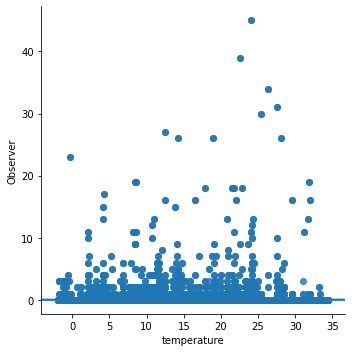

In [153]:
# Scatter plot1
sns.lmplot(x='temper', y='cnt_sum',data=df_cat,fit_reg=True)
#plt.figure(figsize=(10, 10))
#plt.title("Observer vs temperature")
plt.xlabel("temperature")
plt.ylabel("Observer")
plt.savefig('data/catdscatter2.jpg', format='jpg', dpi=300,binwidth=10)

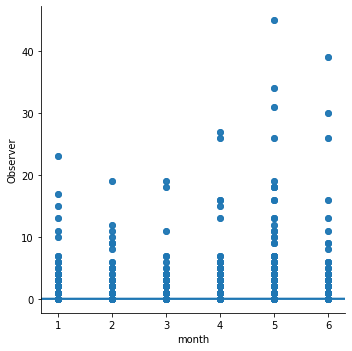

In [151]:
# Scatter plot2
sns.lmplot(x='date_1', y='cnt_sum',data=df_cat,fit_reg=True)
#plt.title("Observer vs month")
plt.xlabel("month")
plt.ylabel("Observer")
plt.savefig('data/catdscatter_month2.jpg', format='jpg', dpi=300,binwidth=10)

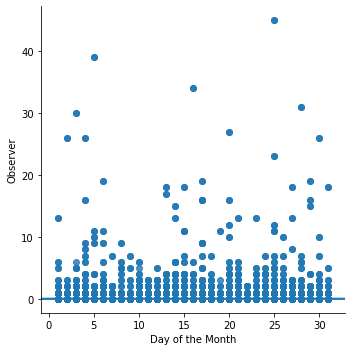

In [152]:
# Scatter plot3
sns.lmplot(x='date_2', y='cnt_sum',data=df_cat,fit_reg=True)
#plt.title("Observer vs DoM")
plt.xlabel("Day of the Month")
plt.ylabel("Observer")
plt.savefig('data/catdscatter_DoM.jpg', format='jpg', dpi=300,binwidth=10)

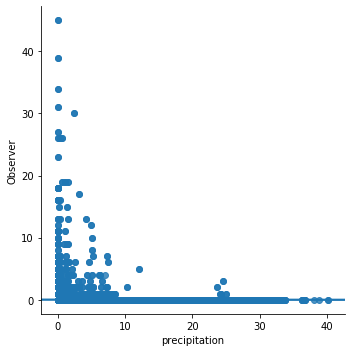

In [154]:
# Scatter plot4
sns.lmplot(x='precip', y='cnt_sum',data=df_cat,fit_reg=True)
#plt.title("Observer vs precipitation")
plt.xlabel("precipitation")
plt.ylabel("Observer")
plt.savefig('data/catdscatter_precip.jpg', format='jpg', dpi=300,binwidth=10)

In [142]:
det_df=df_cat.drop(['Unnamed: 0', 'block', 'date_0', 'other', 'label'], axis=1)

In [143]:
det_df_list = list(det_df.columns)
print(det_df_list)

['date_1', 'date_2', 'temper', 'cnt_sum', 'precip', 'Sum_aantal', 'G_ROADLENGTH', 'P_ROADLENGTH', 'BOS_AREA', 'BEBOUWD_AREA', 'BEDRIJFSTERREIN_AREA', 'DROOG_AREA', 'GLAS_AREA', 'HOOFDWEG_AREA', 'LANDBOUW_AREA']


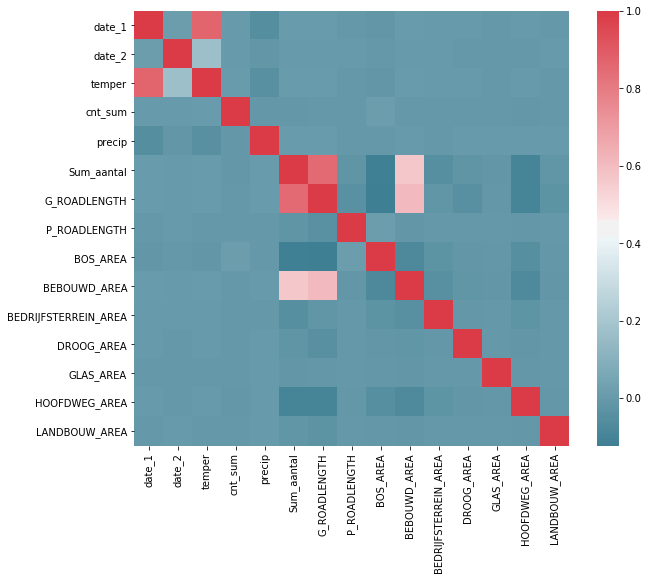

In [155]:
# correlation matrix plot
f, ax = plt.subplots(figsize=(10, 8))
corr = det_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig('data/correl_lesscolnow.jpg', format='jpg', dpi=300,binwidth=10)